In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('prod_with_chem.csv')
df

,Unnamed: 0,name,mfg,num_chem,chem,price,category
0,0,shape tape concealer,tarte,2,"['fragrance', 'parfum']",27.0,Face
1,0,cc+ cream with spf 50+,it cosmetics,1,['steareth'],39.5,Face
2,0,double wear stay-in-place makeup,estée lauder,1,['laureth'],43.0,Face
3,0,born this way undetectable medium-to-full cove...,too faced,0,[],39.0,Face
4,0,translucent loose setting powder,laura mercier,5,"['methylparaben', 'propylparaben', 'ethylparab...",39.0,Face
...,...,...,...,...,...,...,...
6977,0,clear lash adhesive,house of lashes,0,[],8.0,Eyes
6978,0,miami lights glitter palette,nabla,0,[],25.0,By Category
6979,0,lash freak volumizing & lengthening mascara,urban decay cosmetics,1,['steareth'],25.0,Eyes
6980,0,classic brush tip liner,ulta,0,[],9.0,ULTA Collection


# hypothesis testing - chems per brand
### luxury brands will have less cancer causing chemicals per product than basic
#### Welsh T-test

In [3]:
df = df.groupby('mfg').mean()
df = df.drop(['Unnamed: 0'], axis = 1)
df

,num_chem,price
mfg,,
acure,0.103448,16.714138
ahava,2.029412,58.794118
almay,1.772727,9.512727
alpha skin care,2.571429,16.275714
amazing cosmetics,0.166667,31.333333
...,...,...
yourgoodskin,1.600000,10.790000
yuni,1.000000,23.833333
zilch,0.000000,139.000000


In [4]:
x = []

for num in range(len(df['num_chem'])):
    x.append(df['price'].iloc[num])

print (statistics.mean(x))

25.140063213612073


In [5]:
basic = pd.DataFrame()
luxury = pd.DataFrame()

In [6]:
for x in range(len(df['price'])):
    if df['price'].iloc[x] >= 25.140:
        luxury = luxury.append(df.iloc[x])
    else:
        basic = basic.append(df.iloc[x])
        

In [7]:
luxury

,num_chem,price
ahava,2.029412,58.794118
amazing cosmetics,0.166667,31.333333
anastasia beverly hills,1.274510,27.019020
arcona,0.416667,59.916667
au naturale,0.333333,29.444444
...,...,...
vdl,1.923077,29.692308
vita liberata,0.166667,40.666667
zilch,0.000000,139.000000
zitsticka,0.000000,26.333333


In [8]:
basic

,num_chem,price
acure,0.103448,16.714138
almay,1.772727,9.512727
alpha skin care,2.571429,16.275714
american crew,2.000000,14.950000
ancient healing clay,0.000000,9.990000
...,...,...
wish formula,0.000000,15.970000
wunder2,0.823529,17.967647
yes to,1.842105,10.042632
yourgoodskin,1.600000,10.790000


In [9]:
lnum = luxury['num_chem'].tolist()
lprice = luxury['price'].tolist()

In [10]:
bnum = basic['num_chem'].tolist()
bprice = basic['price'].tolist()

[Text(0, 0, 'lux'), Text(0, 0, 'basic')]

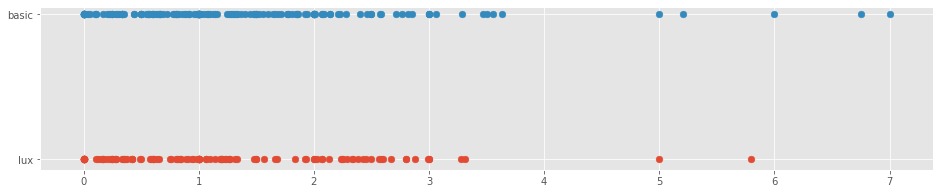

In [11]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(lnum, np.repeat(0, len(lnum)), s=45)
ax.scatter(bnum, np.repeat(1, len(bnum)), s =45)

ax.set_yticks([0, 1])
ax.set_yticklabels(["lux", "basic"])

[Text(0, 0, 'lux'), Text(0, 0, 'basic')]

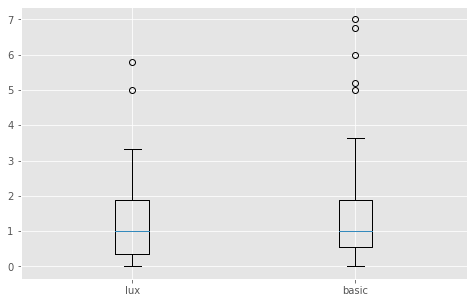

In [12]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([lnum, bnum])
ax.set_xticks([1,2])
ax.set_xticklabels(["lux", "basic"])

In [13]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [14]:
test_statistic = welch_test_statistic(lnum, bnum)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -1.15


In [15]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [16]:
df = welch_satterhwaithe_df(lnum, bnum)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(df))

Degrees of Freedom for Welch's Test: 289.84


Text(0.5, 1.0, "Distribution of Welsh's Test Statistic Under the Null Hypothesis")

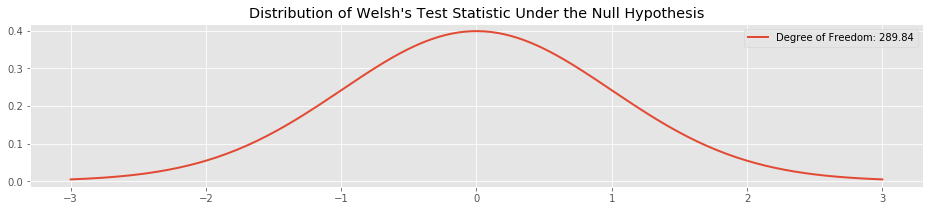

In [17]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
chemicals = stats.t(df)
ax.plot(x, chemicals.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis")

Text(0.5, 1.0, 'p-value Reigon')

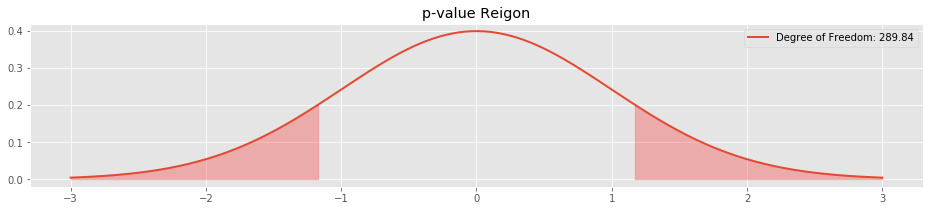

In [18]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
chemicals = stats.t(df)
ax.plot(x, chemicals.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(df))
_ = ax.fill_between(x, chemicals.pdf(x), where=(x >= -test_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, chemicals.pdf(x), where=(x <= test_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Reigon")

In [19]:
p_value = chemicals.cdf(test_statistic) + (1 - chemicals.cdf(-test_statistic))
print("p-value for different average number of chemicals: {:2.4f}".format(p_value))

p-value for different average number of chemicals: 0.2512


p value is not less than .1 so I cannot reject the null hypothesis

In [20]:
sats.

SyntaxError: invalid syntax (<ipython-input-20-bef5d9074f5d>, line 1)

#### Mann-Whitney test

[Text(0, 0, 'lux'), Text(0, 0, 'basic')]

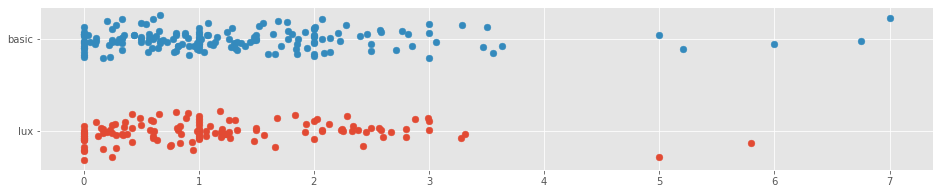

In [21]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(lnum, np.repeat(0, len(lnum)) + np.random.normal(0, 0.1, len(lnum)), s=45)
ax.scatter(bnum, np.repeat(1, len(bnum)) + np.random.normal(0, 0.1, len(bnum)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["lux", "basic"])

In [22]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

In [23]:
basic_wins = count_winning_pairs(bnum, lnum)
lux_wins = count_winning_pairs(lnum, bnum)
print("Number of basic having higher chemicals: {}".format(basic_wins))
print("Number of lux having higher chemicals: {}".format(lux_wins))

Number of basic having higher chemicals: 11865.5
Number of lux having higher chemicals: 10359.5


In [24]:
res = stats.mannwhitneyu(lnum, bnum, alternative="greater")
print(res)

MannwhitneyuResult(statistic=10359.5, pvalue=0.8429788617390415)
